<a href="https://colab.research.google.com/github/brunasil98/Nationwide_AAnalytics./blob/main/Nationwide_AAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U imbalanced-learn

In [ ]:
import pandas as pd  
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv1D,Conv2D, MaxPooling1D, BatchNormalization
from keras.models import load_model
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, classification_report
from keras.layers import Activation, Dropout, Flatten, Dense
from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.under_sampling import RandomUnderSampler

from keras.layers.core import Dense, Activation  
from keras.layers.recurrent import LSTM
import tensorflow.keras.utils as conv_utils
import tensorflow as tf
from keras.callbacks import EarlyStopping, ModelCheckpoint

pd.set_option('display.max_rows', 100)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_1 = pd.read_csv('/content/drive/MyDrive/Nationwide_AAnalytics/TRAIN_SET_2021.csv')
df_2 = pd.read_csv('/content/drive/MyDrive/Nationwide_AAnalytics/TEST_SET_2021.csv')

In [ ]:
df_1.nunique()

RESTAURANT_SERIAL_NUMBER            15673
RESTAURANT_PERMIT_NUMBER             8654
RESTAURANT_NAME                      8317
RESTAURANT_LOCATION                  4963
RESTAURANT_CATEGORY                    31
ADDRESS                              4784
CITY                                   27
STATE                                  13
ZIP                                  2483
CURRENT_DEMERITS                       54
CURRENT_GRADE                          16
EMPLOYEE_COUNT                         53
MEDIAN_EMPLOYEE_AGE                 15293
MEDIAN_EMPLOYEE_TENURE              15376
INSPECTION_TIME                     14271
INSPECTION_TYPE                         5
INSPECTION_DEMERITS                    64
VIOLATIONS_RAW                      11397
RECORD_UPDATED                       4941
LAT_LONG_RAW                         4718
FIRST_VIOLATION                        68
SECOND_VIOLATION                       73
THIRD_VIOLATION                        80
FIRST_VIOLATION_TYPE              

In [ ]:
df_1['CURRENT_GRADE'].value_counts()
# Next step will give value for A =3;B =2; C = 1; and make average of value for each zip code
#Make the other non count because I could not figure out what mean X, O,N, and I believe the rest is only spelling mistake

A             14915
B               215
C               104
X                75
O                32
N                13
7                 2
K                 1
U                 1
NASA              1
I                 1
.\<><1@#&|        1
A+                1
VPN               1
UPN               1
EIEIO             1
Name: CURRENT_GRADE, dtype: int64

In [ ]:
df_1[['ZIP_CODE', 'ZC']] = df_1['ZIP'].str.split('-', 1, expand=True)
print(df_1[['ZIP','ZIP_CODE','ZC']].head(20))

           ZIP ZIP_CODE    ZC
0   89169-2617    89169  2617
1   89108-4588    89108  4588
2   89130-3505    89130  3505
3   89101-1517    89101  1517
4   89169-6574    89169  6574
5   89103-5420    89103  5420
6   89147-8396    89147  8396
7   89119-2318    89119  2318
8        89005    89005  None
9   89109-4345    89109  4345
10       89101    89101  None
11  89121-5074    89121  5074
12  89109-4574    89109  4574
13  89183-4013    89183  4013
14  89121-7315    89121  7315
15       89103    89103  None
16  89109-4333    89109  4333
17  89015-7367    89015  7367
18  89119-6309    89119  6309
19       89130    89130  None


In [ ]:
a = pd.DataFrame()
a['ZIP_CODE'] = df_1['ZIP_CODE']
a['Grade'] = df_1['CURRENT_GRADE']
a = a.drop(a[a['Grade'] == 'X' ].index)
a = a.drop(a[a['Grade'] == 'O' ].index)
a = a.drop(a[a['Grade'] == 'N' ].index)
a = a.drop(a[a['Grade'] == '7' ].index)
a = a.drop(a[a['Grade'] == 'VPN' ].index)
a = a.drop(a[a['Grade'] == 'UPN' ].index)
a = a.drop(a[a['Grade'] == 'U' ].index)
a = a.drop(a[a['Grade'] == 'NASA' ].index)
a = a.drop(a[a['Grade'] == 'K' ].index)
a = a.drop(a[a['Grade'] == 'I' ].index)
a = a.drop(a[a['Grade'] == 'EIEIO' ].index)
a = a.drop(a[a['Grade'] == 'A+' ].index)
a = a.drop(a[a['Grade'] == '.\<><1@#&|' ].index)
a = a.drop(a[a['ZIP_CODE'] == '9.87898E+15'].index)

In [ ]:
a['Grade'].value_counts()

A    14914
B      215
C      104
Name: Grade, dtype: int64

In [ ]:
a['Points']= a['Grade'].apply(lambda x :3 if x == 'A' else 2 if x == "B" else 1 )
a[a['Grade'] == 'A']

,ZIP_CODE,Grade,Points
0,89169,A,3
1,89108,A,3
2,89130,A,3
3,89101,A,3
4,89169,A,3
...,...,...,...
15668,89114,A,3
15669,89030,A,3
15670,89109,A,3
15671,89005,A,3


In [ ]:
a = a.groupby(a['ZIP_CODE']).mean()
a = a.sort_values(by='Points', ascending=True)
a= a.iloc[:5]
x = a.index
y = a['Points']

<BarContainer object of 5 artists>

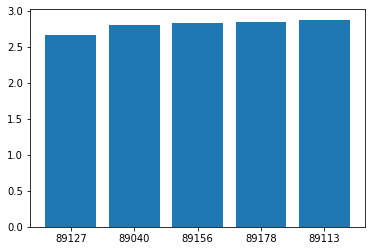

In [ ]:
plt.bar(x, y)

In [ ]:
b = pd. DataFrame()
b['FIRST_VIOLATION'] = df_1['FIRST_VIOLATION']
b['Points'] = 1
b = b.drop(b[b['FIRST_VIOLATION'] == 8675309.0].index)
b = b.groupby(b['FIRST_VIOLATION']).sum()
b = b.sort_values(by='Points', ascending=False)
b_plot = b.iloc[0:5]
y_b = b_plot["Points"]
x_b = b_plot.index

In [ ]:
c = pd. DataFrame()
c['SECOND_VIOLATION'] = df_1['SECOND_VIOLATION']
c['Points'] = 1
c = c.groupby(c['SECOND_VIOLATION']).sum()
c = c.sort_values(by='Points', ascending=False)
c_plot = c.iloc[0:5]
y_c = c_plot["Points"]
x_c = c_plot.index

In [ ]:
d = pd. DataFrame()
d['THIRD_VIOLATION'] = df_1['THIRD_VIOLATION']
d['Points'] = 1
d = d.groupby(d['THIRD_VIOLATION']).sum()
d = d.sort_values(by='Points', ascending=False)
d_plot = d.iloc[0:5]
#d_plot = d_plot.sort_values(by=d_plot.index, ascending=False)
y_d = d_plot["Points"]
x_d = d_plot.index.sort_values()

In [ ]:
total = pd.DataFrame({
    'First': df_1['FIRST_VIOLATION'],
    'Second': df_1['SECOND_VIOLATION'],
    'Third': df_1['THIRD_VIOLATION']})
total = total.stack().reset_index()
total = total.drop(columns=['level_0', 'level_1'])
total['Points'] = 1
total = total.groupby(total[0]).sum()
total = total.sort_values(by='Points', ascending=False)

other = total.iloc[10:]
T = other.sum()
total.loc['Other'] = T

total = total.sort_values(by='Points', ascending=False)
total_plot = total.iloc[0:10]
x_t = total_plot["Points"].sort_values()
y_t = total_plot.index


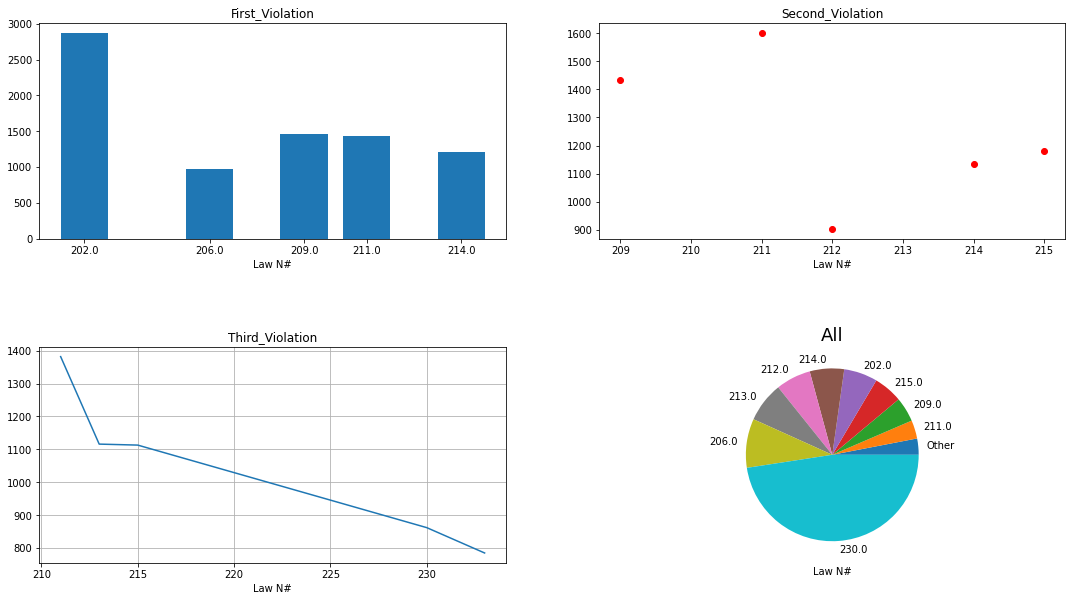

In [ ]:
plt.subplot(2,2,1)
plt.bar(x_b,y_b, tick_label = x_b, width  = 1.5)
plt.title('First_Violation')
plt.xlabel('Law N#')

plt.subplot(2,2,2)
plt.scatter(x_c,y_c, facecolors="red")
plt.title('Second_Violation')
plt.xlabel('Law N#')

plt.subplot(2,2,3)
plt.plot(x_d,y_d,label= x_d)
plt.grid(True)
#plt.bar(x_d,y_d,tick_label = x_d, width  = 1.5 )
plt.xlabel('Law N#')
plt.title('Third_Violation')

plt.subplot(2,2,4)
plt.pie(x_t,labels  = y_t)
#plt.bar(x_t,y_t,tick_label = x_d, width  = 0.75)
plt.title('All',fontsize = 18)
plt.xlabel('Law N#')


plt.subplots_adjust(right = 2.5,top = 2, hspace = 0.5)

### **Creating the model**

In [ ]:
df_1 = pd.read_csv('/content/drive/MyDrive/Nationwide_AAnalytics/TRAIN_SET_2021.csv')
df_2 = pd.read_csv('/content/drive/MyDrive/Nationwide_AAnalytics/TEST_SET_2021.csv')


In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15673 entries, 0 to 15672
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   RESTAURANT_SERIAL_NUMBER          15673 non-null  object 
 1   RESTAURANT_PERMIT_NUMBER          15673 non-null  object 
 2   RESTAURANT_NAME                   15608 non-null  object 
 3   RESTAURANT_LOCATION               15473 non-null  object 
 4   RESTAURANT_CATEGORY               15543 non-null  object 
 5   ADDRESS                           15603 non-null  object 
 6   CITY                              15437 non-null  object 
 7   STATE                             15464 non-null  object 
 8   ZIP                               15614 non-null  object 
 9   CURRENT_DEMERITS                  15457 non-null  float64
 10  CURRENT_GRADE                     15365 non-null  object 
 11  EMPLOYEE_COUNT                    15580 non-null  float64
 12  MEDI

In [ ]:
df_1.corr(method ='kendall')

,CURRENT_DEMERITS,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION
CURRENT_DEMERITS,1.000000,0.011425,0.006118,-0.005776,-0.013863,-0.028295,-0.036217
EMPLOYEE_COUNT,0.011425,1.000000,0.000863,0.005383,-0.000209,-0.004777,-0.002778
MEDIAN_EMPLOYEE_AGE,0.006118,0.000863,1.000000,0.002315,0.002720,0.004703,0.006280
MEDIAN_EMPLOYEE_TENURE,-0.005776,0.005383,0.002315,1.000000,0.009831,0.005533,0.008546
FIRST_VIOLATION,-0.013863,-0.000209,0.002720,0.009831,1.000000,0.762723,0.692009
SECOND_VIOLATION,-0.028295,-0.004777,0.004703,0.005533,0.762723,1.000000,0.824638
THIRD_VIOLATION,-0.036217,-0.002778,0.006280,0.008546,0.692009,0.824638,1.000000


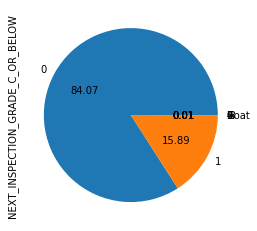

In [ ]:
df_1['NEXT_INSPECTION_GRADE_C_OR_BELOW'].value_counts().plot.pie(autopct = '%.2f')

In [ ]:
###### Give Value for column INSPECTION_TYPE
df_1 = df_1.drop(df_1[df_1['INSPECTION_TYPE'] == '9/20/2011 14:25' ].index)
df_1 = df_1.drop(df_1[df_1['INSPECTION_TYPE'] == 'This Value Intentionally Left Blank' ].index)
print(df_1['INSPECTION_TYPE'].value_counts())
df_1['INSPECTION_TYPE']= df_1['INSPECTION_TYPE'].apply(lambda x :3 if x == 'Routine Inspection' else 2 if x == "Re-inspection" else 1 if x == "Routine Non-Inspection" else np.nan )
print(df_1['INSPECTION_TYPE'].value_counts())

Routine Inspection        14581
Re-inspection               867
Routine Non-Inspection        2
Name: INSPECTION_TYPE, dtype: int64
3.0    14581
2.0      867
1.0        2
Name: INSPECTION_TYPE, dtype: int64


In [ ]:
###### Give Value for column FIRST_VIOLATION_TYPE
df_1 = df_1.drop(df_1[df_1['FIRST_VIOLATION_TYPE'] == 'Major-ish' ].index)
df_1 = df_1.drop(df_1[df_1['FIRST_VIOLATION_TYPE'] == 'To Infinity and Beyond' ].index)
df_1 = df_1.drop(df_1[df_1['FIRST_VIOLATION_TYPE'] == 'Bullwinkle' ].index)
df_1 = df_1.drop(df_1[df_1['FIRST_VIOLATION_TYPE'] == 'Extra Crispy' ].index)
df_1 = df_1.drop(df_1[df_1['FIRST_VIOLATION_TYPE'] == 'Radical' ].index)
df_1 = df_1.drop(df_1[df_1['FIRST_VIOLATION_TYPE'] == 'Not Sure' ].index)
df_1 = df_1.drop(df_1[df_1['FIRST_VIOLATION_TYPE'] == 'Excellent' ].index)
print(df_1['FIRST_VIOLATION_TYPE'].value_counts())
df_1['FIRST_VIOLATION_TYPE']= df_1['FIRST_VIOLATION_TYPE'].apply(lambda x :5 if x == "Imminent Health Hazard" else 4 if x == 'Critical' else 3 if x == "Major" else 2 if x == "Non-Major" else np.nan )
print(df_1['FIRST_VIOLATION_TYPE'].value_counts())

Critical                  7192
Major                     6735
Non-Major                 1588
Imminent Health Hazard       3
Name: FIRST_VIOLATION_TYPE, dtype: int64
4.0    7192
3.0    6735
2.0    1588
5.0       3
Name: FIRST_VIOLATION_TYPE, dtype: int64


In [ ]:
###### Give Value for column SECOND_VIOLATION_TYPE
df_1 = df_1.drop(df_1[df_1['SECOND_VIOLATION_TYPE'] == 'Kitchen Nightmares' ].index)
df_1 = df_1.drop(df_1[df_1['SECOND_VIOLATION_TYPE'] == 'Supercritical' ].index)
print(df_1['SECOND_VIOLATION_TYPE'].value_counts())
df_1['SECOND_VIOLATION_TYPE']= df_1['SECOND_VIOLATION_TYPE'].apply(lambda x :5 if x == "Imminent Health Hazard" else 4 if x == 'Critical' else 3 if x == "Major" else 2 if x == "Non-Major"  else np.nan )
print(df_1['SECOND_VIOLATION_TYPE'].value_counts())

Major                     7902
Non-Major                 4504
Critical                  2984
Imminent Health Hazard       5
Name: SECOND_VIOLATION_TYPE, dtype: int64
3.0    7902
2.0    4504
4.0    2984
5.0       5
Name: SECOND_VIOLATION_TYPE, dtype: int64


In [ ]:
###### Give Value for column THIRD_VIOLATION_TYPE
print(df_1['THIRD_VIOLATION_TYPE'].value_counts())
df_1['THIRD_VIOLATION_TYPE']= df_1['THIRD_VIOLATION_TYPE'].apply(lambda x :5 if x == "Imminent Health Hazard" else 4 if x == 'Critical' else 3 if x == "Major" else 2 if x == "Non-Major"  else np.nan )
print(df_1['THIRD_VIOLATION_TYPE'].value_counts())

Major                     7308
Non-Major                 7277
Critical                   867
Imminent Health Hazard      37
Name: THIRD_VIOLATION_TYPE, dtype: int64
3.0    7308
2.0    7277
4.0     867
5.0      37
Name: THIRD_VIOLATION_TYPE, dtype: int64


In [ ]:
###### Give Value for column CURRENT_GRADE
df_1 = df_1.drop(df_1[df_1['CURRENT_GRADE'] == '7' ].index)
df_1 = df_1.drop(df_1[df_1['CURRENT_GRADE'] == 'I' ].index)
df_1 = df_1.drop(df_1[df_1['CURRENT_GRADE'] == 'UPN' ].index)
df_1 = df_1.drop(df_1[df_1['CURRENT_GRADE'] == 'K' ].index)
df_1 = df_1.drop(df_1[df_1['CURRENT_GRADE'] == 'NASA' ].index)
df_1 = df_1.drop(df_1[df_1['CURRENT_GRADE'] == 'EIEIO' ].index)
df_1 = df_1.drop(df_1[df_1['CURRENT_GRADE'] == 'U' ].index)
df_1 = df_1.drop(df_1[df_1['CURRENT_GRADE'] == 'A+' ].index)
df_1 = df_1.drop(df_1[df_1['CURRENT_GRADE'] == 'VPN' ].index)
print(df_1['CURRENT_GRADE'].value_counts())
df_1['CURRENT_GRADE']= df_1['CURRENT_GRADE'].apply(lambda x :5 if x == "A" else 4 if x == 'B' else 3 if x == "C" else 2 if x == "X" else 1 if x == "O" else 0 if x == "N" else np.nan )
print(df_1['CURRENT_GRADE'].value_counts())

A    14909
B      215
C      104
X       75
O       32
N       13
Name: CURRENT_GRADE, dtype: int64
5.0    14909
4.0      215
3.0      104
2.0       75
1.0       32
0.0       13
Name: CURRENT_GRADE, dtype: int64


In [ ]:
df_1[['ZIP_CODE', 'ZC']] = df_1['ZIP'].str.split('-', 1, expand=True)
df_1 = df_1.drop(df_1[df_1['INSPECTION_DEMERITS'] == 'Routine Inspection' ].index)
df_1 = df_1.drop(df_1[df_1['NUMBER_OF_VIOLATIONS'] == 'Nevada' ].index)

In [ ]:
print(df_1['NEXT_INSPECTION_GRADE_C_OR_BELOW'].value_counts())
df_1 = df_1.drop(df_1[df_1['NEXT_INSPECTION_GRADE_C_OR_BELOW'] == '3' ].index)
df_1 = df_1.drop(df_1[df_1['NEXT_INSPECTION_GRADE_C_OR_BELOW'] == '-3' ].index)
df_1 = df_1.drop(df_1[df_1['NEXT_INSPECTION_GRADE_C_OR_BELOW'] == 'Goat' ].index)
df_1 = df_1.drop(df_1[df_1['NEXT_INSPECTION_GRADE_C_OR_BELOW'] == '7' ].index)
df_1 = df_1.drop(df_1[df_1['NEXT_INSPECTION_GRADE_C_OR_BELOW'] == '9' ].index)
df_1 = df_1.drop(df_1[df_1['NEXT_INSPECTION_GRADE_C_OR_BELOW'] == '4' ].index)
print(df_1['NEXT_INSPECTION_GRADE_C_OR_BELOW'].value_counts())

0     13135
1      2479
-3        1
7         1
Name: NEXT_INSPECTION_GRADE_C_OR_BELOW, dtype: int64
0    13135
1     2479
Name: NEXT_INSPECTION_GRADE_C_OR_BELOW, dtype: int64


In [ ]:
# Deleting the NuN values
Delete = df_1.loc[:,['CURRENT_DEMERITS','EMPLOYEE_COUNT','MEDIAN_EMPLOYEE_AGE',	'MEDIAN_EMPLOYEE_TENURE','NUMBER_OF_VIOLATIONS','CURRENT_GRADE','INSPECTION_DEMERITS','FIRST_VIOLATION',	'SECOND_VIOLATION',	'THIRD_VIOLATION','INSPECTION_TYPE', 'THIRD_VIOLATION_TYPE','SECOND_VIOLATION_TYPE','FIRST_VIOLATION_TYPE','ZIP_CODE','NEXT_INSPECTION_GRADE_C_OR_BELOW']]
print(Delete.isnull().sum())
Delete = Delete.dropna()
print(Delete.isnull().sum())
Delete = Delete.apply(pd.to_numeric) 

CURRENT_DEMERITS                    215
EMPLOYEE_COUNT                       93
MEDIAN_EMPLOYEE_AGE                  34
MEDIAN_EMPLOYEE_TENURE              297
NUMBER_OF_VIOLATIONS                169
CURRENT_GRADE                       308
INSPECTION_DEMERITS                 253
FIRST_VIOLATION                     212
SECOND_VIOLATION                     84
THIRD_VIOLATION                      61
INSPECTION_TYPE                     220
THIRD_VIOLATION_TYPE                173
SECOND_VIOLATION_TYPE               267
FIRST_VIOLATION_TYPE                146
ZIP_CODE                             59
NEXT_INSPECTION_GRADE_C_OR_BELOW     40
dtype: int64
CURRENT_DEMERITS                    0
EMPLOYEE_COUNT                      0
MEDIAN_EMPLOYEE_AGE                 0
MEDIAN_EMPLOYEE_TENURE              0
NUMBER_OF_VIOLATIONS                0
CURRENT_GRADE                       0
INSPECTION_DEMERITS                 0
FIRST_VIOLATION                     0
SECOND_VIOLATION                    0
THIRD

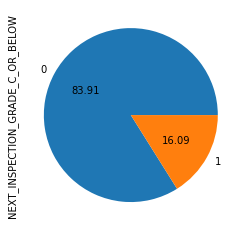

In [ ]:
Delete['NEXT_INSPECTION_GRADE_C_OR_BELOW'].value_counts().plot.pie(autopct = '%.2f')

In [ ]:
Delete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13204 entries, 0 to 15672
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CURRENT_DEMERITS                  13204 non-null  float64
 1   EMPLOYEE_COUNT                    13204 non-null  float64
 2   MEDIAN_EMPLOYEE_AGE               13204 non-null  float64
 3   MEDIAN_EMPLOYEE_TENURE            13204 non-null  float64
 4   NUMBER_OF_VIOLATIONS              13204 non-null  int64  
 5   CURRENT_GRADE                     13204 non-null  float64
 6   INSPECTION_DEMERITS               13204 non-null  int64  
 7   FIRST_VIOLATION                   13204 non-null  float64
 8   SECOND_VIOLATION                  13204 non-null  float64
 9   THIRD_VIOLATION                   13204 non-null  float64
 10  INSPECTION_TYPE                   13204 non-null  float64
 11  THIRD_VIOLATION_TYPE              13204 non-null  float64
 12  SECO

In [ ]:
Delete.corr(method ='kendall')

,CURRENT_DEMERITS,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,NUMBER_OF_VIOLATIONS,CURRENT_GRADE,INSPECTION_DEMERITS,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION,INSPECTION_TYPE,THIRD_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,FIRST_VIOLATION_TYPE,ZIP_CODE,NEXT_INSPECTION_GRADE_C_OR_BELOW
CURRENT_DEMERITS,1.000000,0.007229,0.005577,-0.004554,0.059995,-0.208133,0.049022,-0.014754,-0.030390,-0.037912,-0.045760,0.045503,0.034159,0.006981,-0.000192,0.011287
EMPLOYEE_COUNT,0.007229,1.000000,0.000124,0.005651,0.011326,-0.005503,0.011636,0.004827,-0.001186,0.001115,-0.001469,0.010122,0.015499,0.009323,-0.004562,-0.001425
MEDIAN_EMPLOYEE_AGE,0.005577,0.000124,1.000000,0.006824,0.004958,-0.011016,-0.000817,0.005753,0.006969,0.008703,-0.001277,-0.008793,0.002391,0.001720,-0.010445,-0.009291
MEDIAN_EMPLOYEE_TENURE,-0.004554,0.005651,0.006824,1.000000,-0.005353,-0.003395,-0.003017,0.008627,0.004715,0.007654,-0.005204,0.001823,0.001484,-0.006270,0.003375,-0.001835
NUMBER_OF_VIOLATIONS,0.059995,0.011326,0.004958,-0.005353,1.000000,-0.074672,0.709866,-0.140653,-0.217759,-0.284156,0.070213,0.515829,0.476050,0.427141,0.012478,0.052998
CURRENT_GRADE,-0.208133,-0.005503,-0.011016,-0.003395,-0.074672,1.000000,-0.073056,0.016014,0.023001,0.026646,0.038447,-0.071202,-0.060088,-0.052181,-0.003118,-0.041495
INSPECTION_DEMERITS,0.049022,0.011636,-0.000817,-0.003017,0.709866,-0.073056,1.000000,-0.231191,-0.304763,-0.322293,0.089294,0.627397,0.651267,0.603219,0.005182,0.046952
FIRST_VIOLATION,-0.014754,0.004827,0.005753,0.008627,-0.140653,0.016014,-0.231191,1.000000,0.762189,0.692614,-0.147195,-0.103653,-0.070106,-0.182741,0.008779,-0.015298
SECOND_VIOLATION,-0.030390,-0.001186,0.006969,0.004715,-0.217759,0.023001,-0.304763,0.762189,1.000000,0.824993,-0.169034,-0.205541,-0.190454,-0.081473,0.005128,-0.020109
THIRD_VIOLATION,-0.037912,0.001115,0.008703,0.007654,-0.284156,0.026646,-0.322293,0.692614,0.824993,1.000000,-0.166846,-0.250366,-0.117857,-0.029942,0.002255,-0.016775


In [ ]:
base = Delete.loc[:,['NUMBER_OF_VIOLATIONS','CURRENT_GRADE',	'INSPECTION_DEMERITS',	'THIRD_VIOLATION_TYPE',	'SECOND_VIOLATION_TYPE',	'FIRST_VIOLATION_TYPE']]

asw = Delete.loc[:,['NEXT_INSPECTION_GRADE_C_OR_BELOW']]

In [ ]:
base = base.apply(pd.to_numeric) 
b_np = base.to_numpy()
np.random.RandomState(seed=56).shuffle(b_np)

asw = asw.apply(pd.to_numeric) 
asw_np = asw.to_numpy()
np.random.RandomState(seed=56).shuffle(asw_np)
asw.count()

NEXT_INSPECTION_GRADE_C_OR_BELOW    13204
dtype: int64

In [ ]:
X_tr, X_ts, Y_tr, Y_ts = train_test_split(base, asw, test_size = 0.1)

In [ ]:
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(6,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#es_monitor = [EarlyStopping(patience=250, monitor='val_accuracy', verbose = 1, mode = 'min', restore_best_weights=True),
#             ModelCheckpoint(mode = 'min', filepath='/content/drive/MyDrive/Nationwide_AAnalytics/Train_A', save_best_only=True) ] 


### **UNDER**

In [ ]:
#Delete the majority
under = RandomUnderSampler(sampling_strategy = 1)
x_un, y_un = under.fit_resample(base,asw)
y_un.count()

NEXT_INSPECTION_GRADE_C_OR_BELOW    4248
dtype: int64

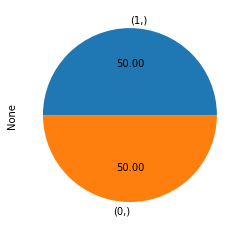

In [ ]:
y_un.value_counts().plot.pie(autopct = '%.2f')

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_un, y_un, test_size = 0.1)


In [ ]:
model.fit(x_train,y_train,batch_size=32,
                    epochs=1000,
                    validation_split = 0.1,
                    #callbacks=[es_monitor]
                    )

Epoch 1/1000
108/108 [==============================] - 1s 3ms/step - loss: 2.0128 - accuracy: 0.4945 - val_loss: 0.8549 - val_accuracy: 0.4726
Epoch 2/1000
108/108 [==============================] - 0s 1ms/step - loss: 0.8093 - accuracy: 0.4863 - val_loss: 0.7588 - val_accuracy: 0.4935
Epoch 3/1000
108/108 [==============================] - 0s 1ms/step - loss: 0.7628 - accuracy: 0.4951 - val_loss: 0.7211 - val_accuracy: 0.5039
Epoch 4/1000
108/108 [==============================] - 0s 1ms/step - loss: 0.7409 - accuracy: 0.4855 - val_loss: 0.7080 - val_accuracy: 0.5117
Epoch 5/1000
108/108 [==============================] - 0s 1ms/step - loss: 0.7310 - accuracy: 0.4872 - val_loss: 0.7128 - val_accuracy: 0.4987
Epoch 6/1000
108/108 [==============================] - 0s 1ms/step - loss: 0.7239 - accuracy: 0.4948 - val_loss: 0.6990 - val_accuracy: 0.5091
Epoch 7/1000
108/108 [==============================] - 0s 1ms/step - loss: 0.7190 - accuracy: 0.4971 - val_loss: 0.6993 - val_accuracy:

In [ ]:
model.save('/content/drive/MyDrive/Nationwide_AAnalytics/Under.h5')

In [ ]:
_, acc = model.evaluate(x_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

14/14 [==============================] - 0s 1ms/step - loss: 0.8020 - accuracy: 0.5059
Accuracy =  50.58823823928833 %


In [ ]:
y_pred = model.predict(x_test)
np.unique(y_pred)

array([0.06151679, 0.14076224, 0.30042922, 0.3389842 , 0.36500055,
       0.36933243, 0.39089185, 0.39811987, 0.41987443, 0.44032353,
       0.44060597, 0.45311838, 0.45761436, 0.4606013 , 0.46204728,
       0.46472985, 0.4655377 , 0.46648622, 0.46993056, 0.47320673,
       0.47537935, 0.47738203, 0.47996655, 0.4805699 , 0.48176578,
       0.48298898, 0.48356083, 0.4838958 , 0.48532525, 0.4880254 ,
       0.4886452 , 0.48995584, 0.4904191 , 0.49047962, 0.4916703 ,
       0.49222732, 0.49248543, 0.49343398, 0.49343404, 0.4940086 ,
       0.49406323, 0.49424893, 0.4948799 , 0.4954939 , 0.49567395,
       0.49630314, 0.49681297, 0.49697834, 0.49704584, 0.4970726 ,
       0.4981867 , 0.5003129 , 0.50066537, 0.50112677, 0.5012796 ,
       0.5024659 , 0.50320864, 0.50331265, 0.50358   , 0.5039781 ,
       0.5050728 , 0.5050921 , 0.5055471 , 0.5055883 , 0.50558835,
       0.50620264, 0.50647956, 0.50666106, 0.50704277, 0.5071664 ,
       0.508173  , 0.508573  , 0.50870264, 0.50898194, 0.50913

In [ ]:
y_pred = np.where(y_pred > 0.5, 1, 0)
np.unique(y_pred)

array([0, 1])

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 65, 146],
       [ 64, 150]])

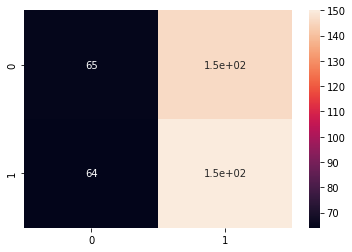

In [ ]:
 f = sns.heatmap(cm, annot=True)

In [ ]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.50      0.31      0.38       211\n           1       0.51      0.70      0.59       214\n\n    accuracy                           0.51       425\n   macro avg       0.51      0.50      0.49       425\nweighted avg       0.51      0.51      0.49       425\n'

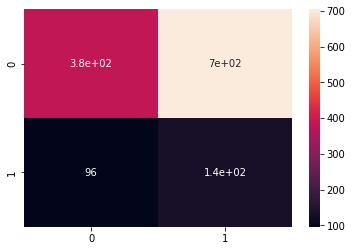

In [ ]:
#Test with unbalanced data
y_pred = model.predict(X_ts)
y_pred = np.where(y_pred > 0.5, 1, 0)
cm = confusion_matrix(Y_ts, y_pred)
f = sns.heatmap(cm, annot=True)

## **OVER**

# RANDOM

In [ ]:
#Increase the minority
over = RandomOverSampler(sampling_strategy = 1)
x_or, y_or = over.fit_resample(base,asw)
y_or.count()

NEXT_INSPECTION_GRADE_C_OR_BELOW    22160
dtype: int64

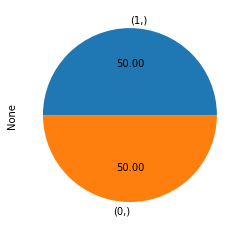

In [ ]:
y_or.value_counts().plot.pie(autopct = '%.2f')

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_or, y_or, test_size = 0.1)

In [ ]:
model.fit(x_train,y_train,batch_size=32,
                    epochs=1000,
                    validation_split = 0.1,
                    #callbacks=[es_monitor]
                    )

Epoch 1/1000
561/561 [==============================] - 1s 1ms/step - loss: 0.6925 - accuracy: 0.5132 - val_loss: 0.6925 - val_accuracy: 0.5118
Epoch 2/1000
561/561 [==============================] - 1s 1ms/step - loss: 0.6916 - accuracy: 0.5163 - val_loss: 0.6919 - val_accuracy: 0.4947
Epoch 3/1000
561/561 [==============================] - 1s 1ms/step - loss: 0.6912 - accuracy: 0.5144 - val_loss: 0.6922 - val_accuracy: 0.5133
Epoch 4/1000
561/561 [==============================] - 1s 1ms/step - loss: 0.6907 - accuracy: 0.5155 - val_loss: 0.6920 - val_accuracy: 0.5088
Epoch 5/1000
561/561 [==============================] - 1s 1ms/step - loss: 0.6905 - accuracy: 0.5160 - val_loss: 0.6921 - val_accuracy: 0.5018
Epoch 6/1000
561/561 [==============================] - 1s 1ms/step - loss: 0.6907 - accuracy: 0.5122 - val_loss: 0.6939 - val_accuracy: 0.5028
Epoch 7/1000
561/561 [==============================] - 1s 1ms/step - loss: 0.6908 - accuracy: 0.5124 - val_loss: 0.6924 - val_accuracy:

In [ ]:
model.save('/content/drive/MyDrive/Nationwide_AAnalytics/Over_Randon.h5')

In [ ]:
_, acc = model.evaluate(x_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

70/70 [==============================] - 0s 1ms/step - loss: 0.6848 - accuracy: 0.5239
Accuracy =  52.391695976257324 %


In [ ]:
y_pred = model.predict(x_test)
np.unique(y_pred)

array([4.8574958e-14, 2.6520552e-10, 1.2199691e-08, 2.0078751e-07,
       1.7396949e-06, 7.8866024e-06, 1.1136751e-05, 2.3698185e-05,
       2.9924512e-04, 1.0662645e-02, 3.5373718e-02, 1.1754826e-01,
       2.0386985e-01, 2.0619947e-01, 2.0619974e-01, 2.4818897e-01,
       2.7210739e-01, 2.8592545e-01, 2.9333386e-01, 3.2902017e-01,
       3.3155400e-01, 3.4073341e-01, 3.4913766e-01, 3.6189336e-01,
       3.6277086e-01, 3.7101483e-01, 3.7335551e-01, 3.7393785e-01,
       3.7411612e-01, 3.7903535e-01, 3.8723302e-01, 3.9390153e-01,
       3.9563024e-01, 3.9689738e-01, 4.0231252e-01, 4.0431502e-01,
       4.0431505e-01, 4.0521389e-01, 4.0578601e-01, 4.0733635e-01,
       4.1328639e-01, 4.1341114e-01, 4.1689417e-01, 4.1731715e-01,
       4.2265686e-01, 4.2265695e-01, 4.2407700e-01, 4.2407703e-01,
       4.2658132e-01, 4.2704254e-01, 4.2704257e-01, 4.2759824e-01,
       4.3065831e-01, 4.3119779e-01, 4.3207061e-01, 4.3361068e-01,
       4.3537527e-01, 4.3651167e-01, 4.3704432e-01, 4.3767315e

In [ ]:
y_pred = np.where(y_pred > 0.5, 1, 0)
np.unique(y_pred)

array([0, 1])

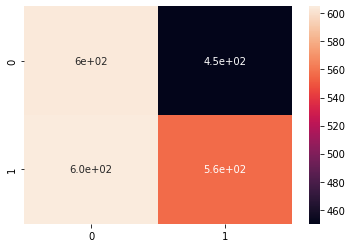

In [ ]:
cm = confusion_matrix(y_test, y_pred)
f = sns.heatmap(cm, annot=True)

In [ ]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.50      0.57      0.53      1054\n           1       0.55      0.48      0.51      1162\n\n    accuracy                           0.52      2216\n   macro avg       0.53      0.53      0.52      2216\nweighted avg       0.53      0.52      0.52      2216\n'

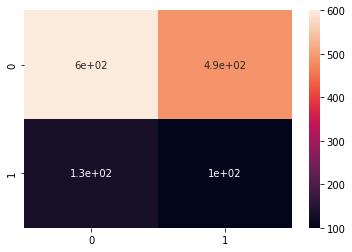

In [ ]:
#Test with unbalanced data
y_pred = model.predict(X_ts)
y_pred = np.where(y_pred > 0.5, 1, 0)
cm = confusion_matrix(Y_ts, y_pred)
f = sns.heatmap(cm, annot=True)

### **SMOTE**

In [ ]:
sm = SMOTE()
x_os, y_os = sm.fit_resample(base,asw)
y_os.count()

NEXT_INSPECTION_GRADE_C_OR_BELOW    22160
dtype: int64

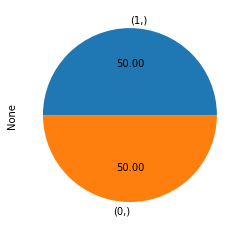

In [ ]:
y_os.value_counts().plot.pie(autopct = '%.2f')

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_os, y_os, test_size = 0.1)

In [ ]:
model.fit(x_train,y_train,batch_size=32,
                    epochs=1000,
                    validation_split = 0.1,
                    #callbacks=[es_monitor]
                    )

Epoch 1/1000
561/561 [==============================] - 1s 2ms/step - loss: 0.6890 - accuracy: 0.5253 - val_loss: 0.6881 - val_accuracy: 0.5218
Epoch 2/1000
561/561 [==============================] - 1s 2ms/step - loss: 0.6878 - accuracy: 0.5249 - val_loss: 0.6894 - val_accuracy: 0.5123
Epoch 3/1000
561/561 [==============================] - 1s 2ms/step - loss: 0.6874 - accuracy: 0.5250 - val_loss: 0.6911 - val_accuracy: 0.5183
Epoch 4/1000
561/561 [==============================] - 1s 1ms/step - loss: 0.6875 - accuracy: 0.5304 - val_loss: 0.6888 - val_accuracy: 0.5153
Epoch 5/1000
561/561 [==============================] - 1s 1ms/step - loss: 0.6869 - accuracy: 0.5259 - val_loss: 0.6903 - val_accuracy: 0.5028
Epoch 6/1000
561/561 [==============================] - 1s 2ms/step - loss: 0.6884 - accuracy: 0.5268 - val_loss: 0.6904 - val_accuracy: 0.5328
Epoch 7/1000
561/561 [==============================] - 1s 1ms/step - loss: 0.6875 - accuracy: 0.5250 - val_loss: 0.6870 - val_accuracy:

In [ ]:
model.save('/content/drive/MyDrive/Nationwide_AAnalytics/Over_SMOTE.h5')

In [ ]:
_, acc = model.evaluate(x_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

70/70 [==============================] - 0s 816us/step - loss: 0.6866 - accuracy: 0.5253
Accuracy =  52.52707600593567 %


In [ ]:
y_pred = model.predict(x_test)
np.unique(y_pred)

array([2.39580445e-21, 3.21709847e-15, 3.44984308e-08, 3.00522402e-06,
       1.27748999e-05, 8.78252686e-05, 1.28805637e-04, 2.18698382e-03,
       2.32675672e-03, 6.05234504e-03, 1.09890103e-02, 1.20739937e-02,
       1.20740235e-02, 1.35968626e-02, 2.62373686e-02, 6.25653863e-02,
       7.35212266e-02, 9.36597586e-02, 1.00864589e-01, 1.15992993e-01,
       1.34149969e-01, 1.42153889e-01, 1.84721231e-01, 2.02027231e-01,
       2.05835313e-01, 2.74047017e-01, 2.78883636e-01, 2.79428393e-01,
       3.27060223e-01, 3.27399433e-01, 3.51361483e-01, 3.52316678e-01,
       3.52616221e-01, 3.64263833e-01, 3.74495536e-01, 3.78539503e-01,
       3.80928218e-01, 3.82527143e-01, 4.03791934e-01, 4.08526421e-01,
       4.10817653e-01, 4.13999915e-01, 4.15439397e-01, 4.17286843e-01,
       4.23647881e-01, 4.31955278e-01, 4.33300793e-01, 4.34082448e-01,
       4.39060628e-01, 4.42523301e-01, 4.50047255e-01, 4.50969547e-01,
       4.52334583e-01, 4.56009537e-01, 4.56636220e-01, 4.58482742e-01,
      

In [ ]:
y_pred = np.where(y_pred > 0.5, 1, 0)
np.unique(y_pred)

array([0, 1])

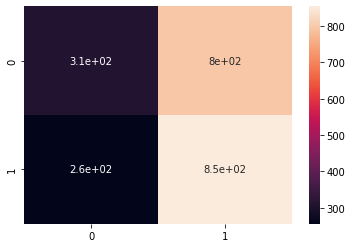

In [ ]:
cm = confusion_matrix(y_test, y_pred)
f = sns.heatmap(cm, annot=True)

In [ ]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.55      0.28      0.37      1106\n           1       0.52      0.77      0.62      1110\n\n    accuracy                           0.53      2216\n   macro avg       0.53      0.52      0.49      2216\nweighted avg       0.53      0.53      0.50      2216\n'

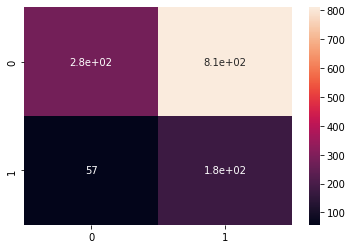

In [ ]:
#Test with unbalanced data
y_pred = model.predict(X_ts)
y_pred = np.where(y_pred > 0.5, 1, 0)
cm = confusion_matrix(Y_ts, y_pred)
f = sns.heatmap(cm, annot=True)

### **Test with Test SET**

In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7505 entries, 0 to 7504
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   RESTAURANT_SERIAL_NUMBER  7505 non-null   object 
 1   RESTAURANT_PERMIT_NUMBER  7505 non-null   object 
 2   RESTAURANT_NAME           7505 non-null   object 
 3   RESTAURANT_LOCATION       7504 non-null   object 
 4   RESTAURANT_CATEGORY       7505 non-null   object 
 5   ADDRESS                   7503 non-null   object 
 6   CITY                      7502 non-null   object 
 7   STATE                     7505 non-null   object 
 8   ZIP                       7503 non-null   object 
 9   CURRENT_DEMERITS          7505 non-null   int64  
 10  CURRENT_GRADE             7503 non-null   object 
 11  INSPECTION_TIME           7502 non-null   object 
 12  INSPECTION_TYPE           7505 non-null   object 
 13  INSPECTION_DEMERITS       7505 non-null   int64  
 14  VIOLATIO

In [ ]:
print(df_2['CURRENT_GRADE'].value_counts())
df_2 = df_2.drop(df_2[df_2['CURRENT_GRADE'] == 'VVVVVV' ].index)
df_2 = df_2.drop(df_2[df_2['CURRENT_GRADE'] == 'Elephant' ].index)
df_2['CURRENT_GRADE']= df_2['CURRENT_GRADE'].apply(lambda x :5 if x == "A" else 4 if x == 'B' else 3 if x == "C" else 2 if x == "X" else 1 if x == "O" else 0 if x == "N" else np.nan )
print(df_2['CURRENT_GRADE'].value_counts())

A    6142
B     107
C      49
X      25
O      19
N       7
Name: CURRENT_GRADE, dtype: int64
5    6142
4     107
3      49
2      25
1      19
0       7
Name: CURRENT_GRADE, dtype: int64


In [ ]:
print(df_2['THIRD_VIOLATION_TYPE'].value_counts())
df_2 = df_2.drop(df_2[df_2['THIRD_VIOLATION_TYPE'] == 'Ilogical' ].index)
df_2['THIRD_VIOLATION_TYPE']= df_2['THIRD_VIOLATION_TYPE'].apply(lambda x :5 if x == "Imminent Health Hazard" else 4 if x == 'Critical' else 3 if x == "Major" else 2 if x == "Non-Major" else np.nan )
print(df_2['THIRD_VIOLATION_TYPE'].value_counts())

Non-Major                 3013
Major                     2943
Critical                   372
Imminent Health Hazard      22
Name: THIRD_VIOLATION_TYPE, dtype: int64
2    3013
3    2943
4     372
5      22
Name: THIRD_VIOLATION_TYPE, dtype: int64


In [ ]:
print(df_2['SECOND_VIOLATION_TYPE'].value_counts())
df_2 = df_2.drop(df_2[df_2['SECOND_VIOLATION_TYPE'] == 'Confusing' ].index)
df_2['SECOND_VIOLATION_TYPE']= df_2['SECOND_VIOLATION_TYPE'].apply(lambda x :5 if x == "Imminent Health Hazard" else 4 if x == 'Critical' else 3 if x == "Major" else 2 if x == "Non-Major" else np.nan )
print(df_2['SECOND_VIOLATION_TYPE'].value_counts())

Major                     3285
Non-Major                 1873
Critical                  1191
Imminent Health Hazard       1
Name: SECOND_VIOLATION_TYPE, dtype: int64
3    3285
2    1873
4    1191
5       1
Name: SECOND_VIOLATION_TYPE, dtype: int64


In [ ]:
print(df_2['FIRST_VIOLATION_TYPE'].value_counts())
df_2 = df_2.drop(df_2[df_2['FIRST_VIOLATION_TYPE'] == '1' ].index)
df_2 = df_2.drop(df_2[df_2['FIRST_VIOLATION_TYPE'] == 'Fuzzy' ].index)
df_2['FIRST_VIOLATION_TYPE']= df_2['FIRST_VIOLATION_TYPE'].apply(lambda x :5 if x == "Imminent Health Hazard" else 4 if x == 'Critical' else 3 if x == "Major" else 2 if x == "Non-Major" else np.nan )
print(df_2['FIRST_VIOLATION_TYPE'].value_counts())

Critical     2955
Major        2725
1            1154
Non-Major     670
Fuzzy           1
Name: FIRST_VIOLATION_TYPE, dtype: int64
4    2955
3    2725
2     670
Name: FIRST_VIOLATION_TYPE, dtype: int64


In [ ]:
f_t = df_2.loc[:,['NUMBER_OF_VIOLATIONS','CURRENT_GRADE',	'INSPECTION_DEMERITS',	'THIRD_VIOLATION_TYPE',	'SECOND_VIOLATION_TYPE',	'FIRST_VIOLATION_TYPE']]
print(f_t.isnull().sum())
f_t = f_t.dropna()
print(f_t.isnull().sum())
f_t = f_t.apply(pd.to_numeric)

NUMBER_OF_VIOLATIONS     0
CURRENT_GRADE            0
INSPECTION_DEMERITS      0
THIRD_VIOLATION_TYPE     0
SECOND_VIOLATION_TYPE    0
FIRST_VIOLATION_TYPE     0
dtype: int64
NUMBER_OF_VIOLATIONS     0
CURRENT_GRADE            0
INSPECTION_DEMERITS      0
THIRD_VIOLATION_TYPE     0
SECOND_VIOLATION_TYPE    0
FIRST_VIOLATION_TYPE     0
dtype: int64


In [ ]:
#Load all the models
o_S = load_model('/content/drive/MyDrive/Nationwide_AAnalytics/Over_SMOTE.h5')
o_R = load_model('/content/drive/MyDrive/Nationwide_AAnalytics/Over_Randon.h5')
u_R = load_model('/content/drive/MyDrive/Nationwide_AAnalytics/Under.h5')

In [ ]:
# Test with load set
p_os = o_S.predict(f_t)
p_os = np.where(p_os > 0.5, 1, 0)
unique, counts = np.unique(p_os, return_counts=True)
print( np.asarray((unique, counts)).T)

[[   0    1]
 [1883 4466]]


In [ ]:
# Test with load set
p_or = o_R.predict(f_t)
p_or = np.where(p_or > 0.5, 1, 0)
unique, counts = np.unique(p_or, return_counts=True)
print( np.asarray((unique, counts)).T)

[[   0 3611]
 [   1 2738]]


In [ ]:
# Test with load set
p_u = u_R.predict(f_t)
p_u = np.where(p_u > 0.5, 1, 0)
unique, counts = np.unique(p_u, return_counts=True)
print( np.asarray((unique, counts)).T)

[[   0 2168]
 [   1 4181]]
